In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [106]:
import os
import pandas as pd
from sklearn import preprocessing,model_selection,neighbors,metrics
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
os.chdir('C:\Program Files\AIML PG')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [57]:
iris_data = pd.read_csv('Iris.csv')
iris_data.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
109,7.2,3.6,6.1,2.5,Iris-virginica
13,4.3,3.0,1.1,0.1,Iris-setosa
100,6.3,3.3,6.0,2.5,Iris-virginica
14,5.8,4.0,1.2,0.2,Iris-setosa
117,7.7,3.8,6.7,2.2,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica
44,5.1,3.8,1.9,0.4,Iris-setosa
57,4.9,2.4,3.3,1.0,Iris-versicolor
36,5.5,3.5,1.3,0.2,Iris-setosa
122,7.7,2.8,6.7,2.0,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [30]:
print(iris_data.info())
print(iris_data.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None
                      count      mean       std  min  25%   50%  75%  max
Sepal Length (in cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
Sepal Width in (cm)   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
Petal length (in cm)  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
Petal width (in cm)   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5


Since all the numerical columns in data frame are shown in 'descriptive' stats of data frame. It proves that there are no missing values in the columns.

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [58]:
lb_encoder = preprocessing.LabelEncoder()
lb_encoder.fit(iris_data.Class)
iris_data.insert(len(iris_data.columns),'Target',lb_encoder.transform(iris_data.Class))
iris_data.drop('Class',axis=1,inplace=True)
iris_data.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Target
64,5.6,2.9,3.6,1.3,1
103,6.3,2.9,5.6,1.8,2
72,6.3,2.5,4.9,1.5,1
38,4.4,3.0,1.3,0.2,0
27,5.2,3.5,1.5,0.2,0
59,5.2,2.7,3.9,1.4,1
48,5.3,3.7,1.5,0.2,0
96,5.7,2.9,4.2,1.3,1
117,7.7,3.8,6.7,2.2,2
67,5.8,2.7,4.1,1.0,1


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [60]:
iris_data.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Target
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Target,0.782561,-0.419446,0.949043,0.956464,1.000000


Each independent variable is strongly co-related with target variable.Hence no feature needs to be dropped

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [61]:
iris_data.var()

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Target                  0.671141
dtype: float64

Since variances of all independent variables is greater than 0.1, no feature needs to be dropped

## Question 6

*Plot the scatter matrix for all the variables.*

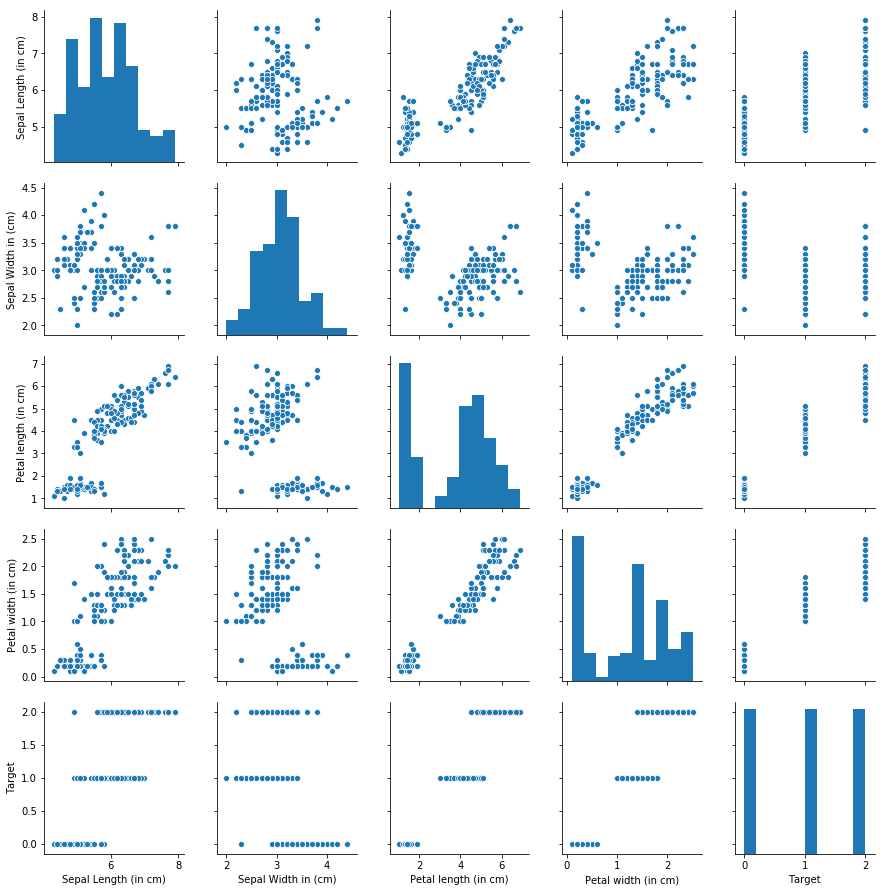

In [63]:
sb.pairplot(iris_data)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [83]:
iris_features = iris_data.drop('Target',axis=1)
iris_target = iris_data.Target
train_x,test_x,train_y,test_y=model_selection.train_test_split(iris_features,iris_target,test_size=0.2,shuffle=True)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((120, 4), (30, 4), (120,), (30,))

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [174]:
knn_classifier = neighbors.KNeighborsClassifier()
for k in range(3,11,2):
    knn_classifier.set_params(n_neighbors=k)
    knn_classifier.fit(train_x,train_y)
    acc=metrics.accuracy_score(test_y,knn_classifier.predict(test_x))
    print('for k= {} accuracy score = {}'.format(k,acc))

for k= 3 accuracy score = 0.8666666666666667
for k= 5 accuracy score = 0.9
for k= 7 accuracy score = 0.9333333333333333
for k= 9 accuracy score = 0.9333333333333333


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [177]:
k_vs_mse_dict = {}
min_tuple = (1,1)
for k in range(1,21,2):
    knn_classifier.set_params(n_neighbors=k)
    k_vs_mse_dict[k]=1-metrics.accuracy_score(test_y,knn_classifier.predict(test_x))
    if(min_tuple[1]>k_vs_mse_dict[k]):
        min_tuple=(k,k_vs_mse_dict[k])
print('Best model has k = {} and MSE = {}'.format(min_tuple[0],min_tuple[1]))

Best model has k = 7 and MSE = 0.06666666666666665


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

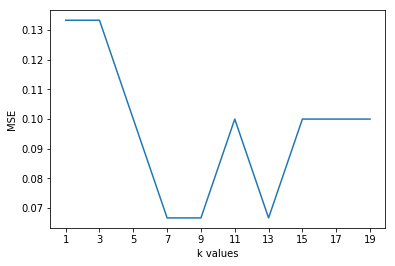

In [176]:
x_axis = k_vs_mse_dict.keys()
y_axis = k_vs_mse_dict.values()
plt.xticks(range(1,21,2))
plt.xlabel('k values')
plt.ylabel('MSE')
plt.plot(x_axis,y_axis)

# Naive Bayes with Iris Data

In [114]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA


### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [156]:
iris_data = pd.read_csv('Iris.csv')
X = iris_data.drop('Class',axis=1)
y = iris_data.Class

In [150]:
#Check the dataset
print(y)
print(X)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [137]:
x_labels = y.unique()

In [138]:
height = [y[y==x].count() for x in x_labels]

<BarContainer object of 3 artists>

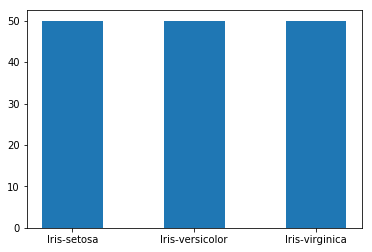

In [142]:
#Drop Id variable from data
plt.bar(x=x_labels,height=height,width=0.5)

### Question 12 
Find Correlation among all variables and give your insights 

In [ ]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [162]:
X.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


Insights : From the co relation data it can be seen that Petal length is highly positively co related with Petal width. This behaviour shows that if petal length of the flower is more then width also increases, that is why the petals of iris flower are broad in shape.

In [163]:
#From the co-relation above, it is evident that Petal length and Petal width are highly co-related.
#Hence one feature can be dropped

X.drop('Petal width (in cm)',axis=1,inplace=True)

### Split data in Training and test set in 80:20.

In [164]:
train_x,test_x,train_y,test_y = model_selection.train_test_split(X,y,test_size=0.2,shuffle=True)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((120, 3), (30, 3), (120,), (30,))

### Question 13 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

In [165]:
pca_transform = PCA()
pca_transform.fit(train_x)
train_x_transformed = pca_transform.transform(train_x)
pca_transform.fit(test_x)
test_x_transformed = pca_transform.transform(test_x)
train_x_transformed.shape,test_x_transformed.shape

((120, 3), (30, 3))

### Question 14 
Train and Fit NaiveBayes Model

In [168]:
#Fit the model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_x_transformed,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [169]:
#Predict
predictions = model.predict(test_x_transformed)
predictions

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype='<U15')

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [172]:
# show Confusion Matrix
con_mat = metrics.confusion_matrix(test_y,predictions)
con_mat

array([[12,  0,  0],
       [ 0,  7,  4],
       [ 0,  0,  7]], dtype=int64)

In [178]:
# show accuracy
acc = metrics.accuracy_score(test_y,predictions)
print('Accuracy score {}'.format(acc))

Accuracy score 0.8666666666666667


In [186]:
#Show precision and Recall metrics
precision_sc = metrics.precision_score(test_y,predictions,average=None)
print('Precision score {}'.format(precision_sc))

Precision score [1.         1.         0.63636364]


In [188]:
recall_sc = metrics.recall_score(test_y,predictions,average=None)
print('Recall score {}'.format(recall_sc))

Recall score [1.         0.63636364 1.        ]
